<h1>EDA</h1>

In [479]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', '{:.4f}'.format)

import warnings
warnings.simplefilter(action='ignore')

<h2>Houses for sale</h2>

In [333]:
houses_for_sale = pd.read_csv('data/houses_for_sale.csv')

In [334]:
houses_for_sale.duplicated().any()

False

In [335]:
houses_for_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          2409 non-null   object 
 1   Location       2409 non-null   object 
 2   Bedrooms       2400 non-null   float64
 3   Bathrooms      2217 non-null   float64
 4   Size           610 non-null    object 
 5   Date           2409 non-null   object 
 6   Amenities      2409 non-null   object 
 7   Url            2409 non-null   object 
 8   Property Type  2409 non-null   object 
 9   Payment_type   2409 non-null   object 
 10  Price          2409 non-null   object 
dtypes: float64(2), object(9)
memory usage: 207.2+ KB


Fill Bedrooms Missing values

In [336]:
houses_for_sale.Bedrooms.describe()

count   2400.0000
mean       4.2425
std        1.1210
min        1.0000
25%        4.0000
50%        4.0000
75%        5.0000
max       10.0000
Name: Bedrooms, dtype: float64

In [337]:
houses_for_sale[houses_for_sale.Bedrooms.isna()]

,Title,Location,Bedrooms,Bathrooms,Size,Date,Amenities,Url,Property Type,Payment_type,Price
544,Townhouse in Lavington,Lavington,NaN,NaN,NaN,03/06/2024,[],/listings/townhouse-for-sale-lavington-3671818,houses,sale,"KSh 63,000,000"
1327,House in Kiambu Town,Kiambu Town,NaN,NaN,NaN,13/05/2024,[],/listings/house-for-sale-kiambu-town-3671866,houses,sale,"KSh 22,500,000"
1328,House at Community Road,"Community road, Syokimau",NaN,NaN,NaN,29/06/2024,[],/listings/house-for-sale-syokimau-3671849,houses,sale,"KSh 14,000,000"
1329,House at Runda,"Runda, Westlands",NaN,NaN,NaN,30/07/2024,[],/listings/house-for-sale-runda-3671794,houses,sale,"KSh 145,000,000"
1331,House at Runda,"Runda, Westlands",NaN,NaN,NaN,30/07/2024,[],/listings/house-for-sale-runda-3671792,houses,sale,"KSh 300,000,000"
1332,House at Runda,"Runda, Westlands",NaN,NaN,NaN,30/07/2024,[],/listings/house-for-sale-runda-3671786,houses,sale,"KSh 300,000,000"
1333,Townhouse in Kitisuru,"Kitisuru, Westlands",NaN,NaN,NaN,05/07/2024,[],/listings/townhouse-for-sale-kitisuru-3671713,houses,sale,"KSh 125,000,000"
2236,House in Nyali Area,"Nyali Area, Nyali",NaN,NaN,NaN,05/06/2024,[],/listings/house-for-sale-nyali-area-1-3388413,houses,sale,"KSh 32,000,000"
2308,Villa in Bofa,Bofa,NaN,NaN,NaN,22/07/2024,[],/listings/villa-for-sale-bofa-3671725,houses,sale,"KSh 150,000,000"


In [338]:
houses_for_sale['Bedrooms'] = houses_for_sale.Bedrooms.fillna(houses_for_sale.Bedrooms.median())
houses_for_sale.Bedrooms.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2409 entries, 0 to 2408
Series name: Bedrooms
Non-Null Count  Dtype  
--------------  -----  
2409 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB


In [339]:
houses_for_sale.duplicated().any()

False

Fill Bathroom missing values

In [340]:
print(f"No. of bedrooms equal to bathrooms {houses_for_sale[houses_for_sale['Bedrooms'] == houses_for_sale['Bathrooms']].Bedrooms.count()}")
print(f"No. of bedrooms greater than bathrooms {houses_for_sale[houses_for_sale['Bedrooms'] > houses_for_sale['Bathrooms']].Bedrooms.count()}")
print(f"No. of bedrooms less than bathrooms {houses_for_sale[houses_for_sale['Bedrooms'] < houses_for_sale['Bathrooms']].Bedrooms.count()}")

No. of bedrooms equal to bathrooms 1139
No. of bedrooms greater than bathrooms 431
No. of bedrooms less than bathrooms 647


In [341]:
isna_id = houses_for_sale[houses_for_sale.Bathrooms.isna()].index

In [342]:
isna_id

Index([  63,  106,  124,  132,  134,  144,  146,  162,  181,  213,
       ...
       2389, 2393, 2395, 2397, 2398, 2399, 2401, 2402, 2403, 2407],
      dtype='int64', length=192)

In [343]:
houses_for_sale['Bathrooms'] = houses_for_sale.Bathrooms.fillna(houses_for_sale.Bedrooms)

In [344]:
houses_for_sale[['Bedrooms', 'Bathrooms']].iloc[isna_id].head()

,Bedrooms,Bathrooms
63,5.0000,5.0000
106,3.0000,3.0000
124,4.0000,4.0000
132,3.0000,3.0000
134,4.0000,4.0000


In [345]:
print(f"No. of bedrooms equal to bathrooms {houses_for_sale[houses_for_sale['Bedrooms'] == houses_for_sale['Bathrooms']].Bedrooms.count()}")
print(f"No. of bedrooms greater than bathrooms {houses_for_sale[houses_for_sale['Bedrooms'] > houses_for_sale['Bathrooms']].Bedrooms.count()}")
print(f"No. of bedrooms less than bathrooms {houses_for_sale[houses_for_sale['Bedrooms'] < houses_for_sale['Bathrooms']].Bedrooms.count()}")

No. of bedrooms equal to bathrooms 1331
No. of bedrooms greater than bathrooms 431
No. of bedrooms less than bathrooms 647


In [346]:
houses_for_sale.Bathrooms.value_counts()

Bathrooms
4.0000     725
5.0000     649
3.0000     461
6.0000     267
2.0000     184
7.0000      60
8.0000      22
10.0000     20
1.0000      14
9.0000       7
Name: count, dtype: int64

Drop irrelevant columns

In [347]:
houses_for_sale.drop(['Size', 'Url', 'Title'], axis=1, inplace=True)

In [348]:
houses_for_sale.duplicated().any()

True

In [349]:
houses_for_sale.drop_duplicates(ignore_index=True, inplace=True)

In [350]:
houses_for_sale.columns

Index(['Location', 'Bedrooms', 'Bathrooms', 'Date', 'Amenities',
       'Property Type', 'Payment_type', 'Price'],
      dtype='object')

Drop rows with missing price values

In [351]:
houses_for_sale = houses_for_sale[houses_for_sale['Price'] != 'Price not communicated'].reset_index(drop=True)

Final House Dataframe

In [352]:
houses_for_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2368 non-null   object 
 1   Bedrooms       2368 non-null   float64
 2   Bathrooms      2368 non-null   float64
 3   Date           2368 non-null   object 
 4   Amenities      2368 non-null   object 
 5   Property Type  2368 non-null   object 
 6   Payment_type   2368 non-null   object 
 7   Price          2368 non-null   object 
dtypes: float64(2), object(6)
memory usage: 148.1+ KB


<h2>Apartments for sale</h2>

In [353]:
apartments_for_sale = pd.read_csv('data/apartments_for_sale.csv')

In [354]:
apartments_for_sale.duplicated().any()

True

We will drop the duplicated rows after cleaning the dataframe

In [355]:
apartments_for_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021 entries, 0 to 4020
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          4021 non-null   object 
 1   Location       4021 non-null   object 
 2   Bedrooms       4014 non-null   float64
 3   Bathrooms      3627 non-null   float64
 4   Size           1203 non-null   object 
 5   Date           4021 non-null   object 
 6   Amenities      4021 non-null   object 
 7   Url            4021 non-null   object 
 8   Property Type  4021 non-null   object 
 9   Payment_type   4021 non-null   object 
 10  Price          4021 non-null   object 
dtypes: float64(2), object(9)
memory usage: 345.7+ KB


In [356]:
apartments_for_sale['Bedrooms'] = apartments_for_sale['Bedrooms'].fillna(apartments_for_sale.Bedrooms.median())

In [357]:
apartments_for_sale.Bathrooms = apartments_for_sale.Bathrooms.fillna(apartments_for_sale.Bedrooms)

In [358]:
apartments_for_sale.Bathrooms.value_counts()

Bathrooms
2.0000     1343
3.0000      919
1.0000      864
4.0000      604
5.0000      231
6.0000       36
0.0000       18
10.0000       6
Name: count, dtype: int64

In [359]:
apartments_for_sale[apartments_for_sale.Price == 'Price not communicated'].Bedrooms.count()

15

In [360]:
apartments_for_sale = apartments_for_sale[apartments_for_sale.Price != 'Price not communicated']

In [361]:
apartments_for_sale.drop(['Size', 'Url', 'Title'], axis=1, inplace=True)

In [362]:
apartments_for_sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4006 entries, 0 to 4020
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       4006 non-null   object 
 1   Bedrooms       4006 non-null   float64
 2   Bathrooms      4006 non-null   float64
 3   Date           4006 non-null   object 
 4   Amenities      4006 non-null   object 
 5   Property Type  4006 non-null   object 
 6   Payment_type   4006 non-null   object 
 7   Price          4006 non-null   object 
dtypes: float64(2), object(6)
memory usage: 281.7+ KB


In [363]:
apartments_for_sale[apartments_for_sale.duplicated(keep=False)].head(10)

,Location,Bedrooms,Bathrooms,Date,Amenities,Property Type,Payment_type,Price
50,Kilimani,3.0000,3.0000,31/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",flats-apartments,sale,"KSh 11,000,000"
52,Kilimani,2.0000,2.0000,31/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",flats-apartments,sale,"KSh 7,000,000"
53,Kilimani,1.0000,1.0000,31/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",flats-apartments,sale,"KSh 4,300,000"
60,Kileleshwa,4.0000,5.0000,31/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",flats-apartments,sale,"KSh 20,000,000"
62,Kileleshwa,3.0000,3.0000,31/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",flats-apartments,sale,"KSh 11,000,000"
63,Kileleshwa,3.0000,3.0000,31/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",flats-apartments,sale,"KSh 11,000,000"
94,Kilimani,1.0000,1.0000,31/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",flats-apartments,sale,"KSh 4,300,000"
106,Kilimani,3.0000,3.0000,31/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",flats-apartments,sale,"KSh 11,000,000"
111,Kilimani,2.0000,2.0000,31/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",flats-apartments,sale,"KSh 7,000,000"
112,Kileleshwa,4.0000,5.0000,31/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",flats-apartments,sale,"KSh 20,000,000"


In [364]:
apartments_for_sale.duplicated().sum()

96

In [365]:
apartments_for_sale.drop_duplicates(inplace=True, ignore_index=True)

<h2>Land for sale</h2>

In [366]:
land_for_sale = pd.read_csv('data/land_for_sale.csv')

In [367]:
land_for_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2932 entries, 0 to 2931
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          2932 non-null   object 
 1   Location       2932 non-null   object 
 2   Bedrooms       1 non-null      float64
 3   Bathrooms      1 non-null      float64
 4   Size           871 non-null    object 
 5   Date           2932 non-null   object 
 6   Amenities      2932 non-null   object 
 7   Url            2932 non-null   object 
 8   Property Type  2932 non-null   object 
 9   Payment_type   2932 non-null   object 
 10  Price          2932 non-null   object 
dtypes: float64(2), object(9)
memory usage: 252.1+ KB


Cannot use Land for sale due to missing values for bedrooms and bathrooms and cant concat with the other dataframes

<h2> Commercial Property for sale </h2>

In [368]:
commercial_prop_for_sale = pd.read_csv('data/commercial_prop_for_sale.csv')

In [369]:
commercial_prop_for_sale.head()

,Title,Location,Bedrooms,Bathrooms,Size,Date,Amenities,Url,Property Type,Payment_type,Price
0,"11,696 ft² Warehouse with Fibre Internet at Ba...","Baba Dogo, Ruaraka",NaN,NaN,11696 ft²,28/06/2024,"['Alarm', 'CCTV', 'Electric Fence', 'Fibre Int...",/listings/11696-ft2-warehouse-for-sale-ruaraka...,commercial-property,sale,"KSh 65,500,000"
1,"2,508 m² Commercial Property in Gigiri","Gigiri, Westlands",NaN,NaN,2508 m²,12/02/2024,[],/listings/2508-m2-commercial-property-for-sale...,commercial-property,sale,Price not communicated
2,"4,550 ft² Commercial Property with Backup Gene...",Karen,NaN,NaN,4550 ft²,12/02/2024,"['Backup Generator', 'Garden', 'Parking']",/listings/4550-ft2-commercial-property-for-sal...,commercial-property,sale,"KSh 120,000,000"
3,Warehouse in Industrial Area,Industrial Area,NaN,NaN,NaN,31/07/2024,[],/listings/warehouse-for-sale-industrial-area-3...,commercial-property,sale,"KSh 500,000,000"
4,Warehouse in Ruaraka,Ruaraka,NaN,NaN,NaN,31/07/2024,[],/listings/warehouse-for-sale-ruaraka-3710983,commercial-property,sale,"KSh 100,000,000"


In [370]:
commercial_prop_for_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          316 non-null    object 
 1   Location       316 non-null    object 
 2   Bedrooms       0 non-null      float64
 3   Bathrooms      0 non-null      float64
 4   Size           106 non-null    object 
 5   Date           316 non-null    object 
 6   Amenities      316 non-null    object 
 7   Url            316 non-null    object 
 8   Property Type  316 non-null    object 
 9   Payment_type   316 non-null    object 
 10  Price          316 non-null    object 
dtypes: float64(2), object(9)
memory usage: 27.3+ KB


Can't use Commercial Property either

<h2>Concat the two dataframes</h2>

In [371]:
final_df = pd.concat([houses_for_sale, apartments_for_sale], ignore_index=True)

In [372]:
final_df.tail()

,Location,Bedrooms,Bathrooms,Date,Amenities,Property Type,Payment_type,Price
6273,"Riverside, Westlands",3.0000,3.0000,01/07/2024,"['Alarm', 'Backup Generator', 'Balcony', 'CCTV...",flats-apartments,sale,"KSh 43,500,000"
6274,"5TH, Nyali Area, Nyali",3.0000,2.0000,22/07/2024,"['Backup Generator', 'Balcony', 'Bus Stop', 'C...",flats-apartments,sale,"KSh 11,250,000"
6275,"Fourways Junction Estate, Kiambu Road",2.0000,2.0000,16/07/2024,"['Balcony', 'Electric Fence', 'En Suite', 'Fib...",flats-apartments,sale,"KSh 9,300,000"
6276,"Waiyaki Way, Westlands",4.0000,6.0000,16/04/2024,[],flats-apartments,sale,"KSh 80,000,000"
6277,"Westlands Area, Westlands",2.0000,2.0000,16/04/2024,[],flats-apartments,sale,"KSh 28,000,000"


In [373]:
final_df.head()

,Location,Bedrooms,Bathrooms,Date,Amenities,Property Type,Payment_type,Price
0,"KITENGELA, Kitengela",3.0000,4.0000,23/07/2024,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",houses,sale,"KSh 5,500,000"
1,"Runda, Westlands",7.0000,7.0000,12/06/2024,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",houses,sale,"KSh 240,000,000"
2,Ngong,3.0000,3.0000,08/07/2024,"['Alarm', 'En Suite', 'Fibre Internet', 'Garde...",houses,sale,"KSh 7,500,000"
3,"Gigiri, Westlands",4.0000,4.0000,26/07/2024,"['Bus Stop', 'En Suite', 'Fibre Internet', 'Ga...",houses,sale,"KSh 110,000,000"
4,"Kirawa Road, Kitisuru, Westlands",5.0000,5.0000,31/07/2024,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",houses,sale,"KSh 85,000,000"


In [374]:
final_df.shape

(6278, 8)

<h2> Convert location to subcounties </h2>

In [375]:
import re

In [376]:
location_to_subcounty = {
    'Westlands': ['Kitisuru', 'Parklands', 'Highridge', 'Karura', 'Kangemi', 'Mountain View', 'Muthaiga', 'Westlands', 'Limuru','Redhill', 'Kiambu Road', 'Ruaka', 'Banana', 'Parkland', 'Hurlingham','Upper Hill', 'Brookside', 'Kyuna', 'Museum Hill', 'Muthangari', 'Nyari', 'Tigoni','Lower Kabete', 'Gigiri', 'Runda', 'Loresho', 'Rosslyn', 'Riverside', 'Thigiri'],
    'Dagoretti North': ['Kilimani', 'Kawangware', 'Gatina', 'Kileleshwa', 'Kabiro', 'Dagoretti North', 'Dagoretti Corner', 'Lavington', 'Valley Arcade', 'Riruta', 'Naivasaha Road', 'Riaira', 'Riara Road'],
    'Dagoretti South': ['Mutu-Ini', 'Ngando', 'Riruta', 'Uthiru', 'Ruthimitu', 'Waithaka', 'Dagoretti South', 'Kikuyu Town', 'Kikuyu'],
    'Langata': ['Karen', 'Nairobi West', 'Mugumu-Ini', 'South C', 'Nyayo Highrise', 'Nyayo', 'Ngong', 'Langata', 'Ongata Rongai', 'Rongai', 'Madaraka', 'Kiserain', 'South B','Bomas of Kenya', 'Golden Estate'],
    'Kibra': ['Laini Saba', 'Lindi Makina','Woodley','Kenyattta Golf Course', 'Sarangombe', 'Kibra', 'Jamhuri', 'Ngumo'],
    'Roysambu': ['Githurai', 'Kahawa West','Zimmerman', 'Roysambu', 'Kahawa Sukari', 'Kahawa Wendani', 'Ruiru', 'Ngecha','Juja', 'Kenyatta Road', 'Thika', 'Ridgeways', 'Mirema Drive','Garden Estate', 'Mirema', 'Tatu City'],
    'Kasarani': ['Clay City', 'Mwiki', 'Kasarani', 'Njiru', 'Ruai', 'Saika', 'Thika Road', 'Chokaa', 'Thome','Peponi', 'Garden City', 'Thindigua'],
    'Ruaraka': ['Baba Dogo', 'Utalii', 'Matahare North', 'Lucky Summer', 'Korogocho', 'Ruaraka'],
    'Embakasi West': ['Umoja I', 'Umoja One', 'Umoja 1', 'Umoja II', 'Umoja Two', 'Umoja 2', 'Umoja', 'Mowelm', 'Kariobangi South', 'Maringo', 'Hamza', 'Embakasi West', 'Donholm'],
    'Embakasi East': ['Upper Savannah', 'Lower Savannah', 'Savannah', 'Embakasi', 'Utawala', 'Mihango', 'Embakasi East','Kamulu', 'Joska', 'Malaa'],
    'Embakasi North': ['Kariobangi North', 'Dandora', 'Embakasi North'],
    'Embakasi South': ['Imara Daima', 'Kwa Njenga', 'Kwa Reuben', 'Pipeline', 'Kware', 'Embakasi South', 'Kitengela', 'Syokimau', 'Mlolongo', 'Athi River', 'Mombasa Road', 'Mombasa Rd', 'Fedha'],
    'Embakasi Central': ['Kayole', 'Kayole North', 'Kayole South', 'Kayole Central', 'Komarock', 'Matopeni', 'Spring Valley', 'Embakasi Central'],
    'Makadara': ['Viwandani', 'Harambee', 'Makongeni', 'Pumwani', 'Eastleigh North','Makadara','Buruburu', 'Jogoo Road', 'Industrial Area'],
    'Kamukunji': ['Eastleigh South', 'Airbase', 'California', 'Ngara', 'Nairobi Central', 'Kamukunji'],
    'Starehe': ['Pangani', 'Ziwani', 'Kariokor', 'Landimawe', 'Nairobi South', 'Hospital', 'Starehe'],
    'Mathare': ['Mabatini', 'Huruma', 'Ngei', 'Mlango Kubwa', 'Kiamaiko', 'Mathare']
}

In [377]:
# Flatten the dictionary into a list of (location, subcounty) pairs
location_to_subcounty_list = [(loc, subcounty) for subcounty, locations in location_to_subcounty.items() for loc in locations]

# Create a dictionary for quick lookup
location_to_subcounty_dict = dict(location_to_subcounty_list)

# Function to get subcounty based on regex matching
def get_subcounty(other_location_details):
    for loc, subcounty in location_to_subcounty_dict.items():
        # Create a regex pattern to match the location name, ignoring case and allowing for partial matches
        pattern = re.compile(re.escape(loc), re.IGNORECASE)
        if pattern.search(other_location_details):
            return subcounty
    return 'Unknown'  # Default if no match is found

# Apply the function to create the 'sub_county' column
final_df['Sub_county'] = final_df['Location'].apply(get_subcounty)

# Display the updated DataFrame
print(final_df.Sub_county.head(10))

0    Embakasi South
1         Westlands
2           Langata
3         Westlands
4         Westlands
5    Embakasi South
6    Embakasi South
7         Westlands
8           Unknown
9           Unknown
Name: Sub_county, dtype: object


In [378]:
final_df.Sub_county.value_counts()

Sub_county
Dagoretti North     2118
Westlands           1949
Unknown             1045
Langata              396
Embakasi South       381
Roysambu             252
Dagoretti South       42
Embakasi East         32
Kasarani              23
Makadara              15
Embakasi Central      10
Embakasi West          6
Kibra                  4
Kamukunji              3
Starehe                2
Name: count, dtype: int64

<h2> Convert Date column to DateTime Series </h2>

In [379]:
final_df['Date'] = pd.DatetimeIndex(final_df['Date'])

In [380]:
final_df['Date'].head()

0   2024-07-23
1   2024-12-06
2   2024-08-07
3   2024-07-26
4   2024-07-31
Name: Date, dtype: datetime64[ns]

<h2> Convert Price string to integers </h2>

In [381]:
final_df['Price'] = final_df['Price'].str.replace('"', '').str.strip()

In [382]:
final_df.Price.head()

0      KSh 5,500,000
1    KSh 240,000,000
2      KSh 7,500,000
3    KSh 110,000,000
4     KSh 85,000,000
Name: Price, dtype: object

In [383]:
final_df['Price'] = final_df['Price'].str.replace(r'^(KSh|\$)\s*', '', regex=True)

In [384]:
final_df['Price'] = final_df['Price'].str.replace(',', '')

In [385]:
final_df['Price'] = final_df['Price'].apply(lambda x: int(x))

In [386]:
final_df['Price'].head()

0      5500000
1    240000000
2      7500000
3    110000000
4     85000000
Name: Price, dtype: int64

Convert df to csv for use when combined with rent data later

In [387]:
final_df.to_csv('./data/final_sale_df.csv', index=False)

<h2> Analyze the Price column </h2>

In [388]:
final_df['Price'].value_counts().head()

Price
6500000     146
12000000    126
20000000    121
25000000    116
7500000     114
Name: count, dtype: int64

In [389]:
final_df.Price.describe()

count         6278.0000
mean      36923886.1086
std       60109810.2503
min              1.0000
25%        9500000.0000
50%       18000000.0000
75%       39375000.0000
max     1750000000.0000
Name: Price, dtype: float64

Since it is sale data, remove rows of houses with selling prices less than 50000

In [390]:
final_df = final_df[final_df.Price >= 50000]

Plot the distribution

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [392]:
sns.set_style('darkgrid')

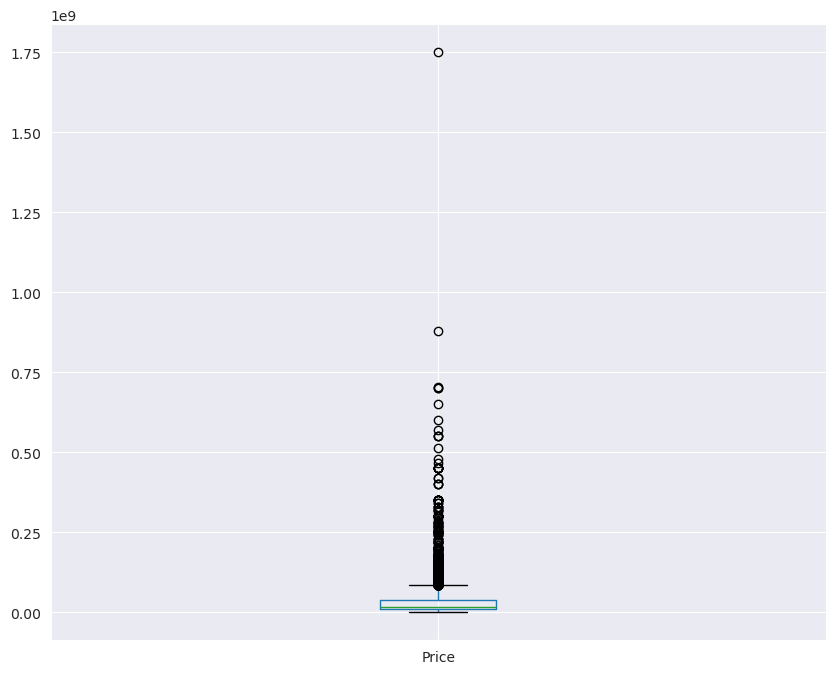

In [393]:
plt.figure(figsize=(10, 8))
final_df.boxplot(column='Price')
plt.show()

In [394]:
px.box(data_frame=final_df, y='Price')

Normal distribution Mean: 3.693e+07, Skew: 7.6881 and Std Deviation: 6.0108e+07


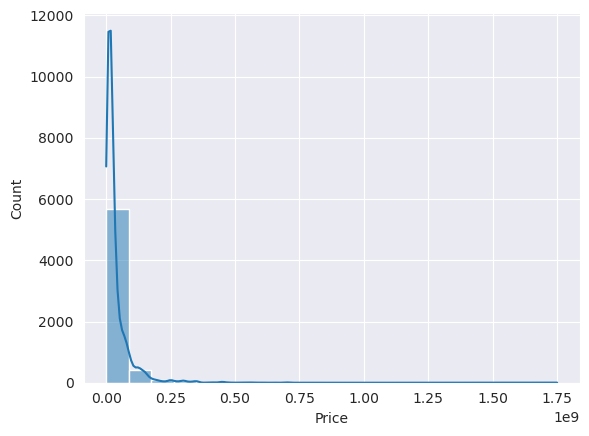

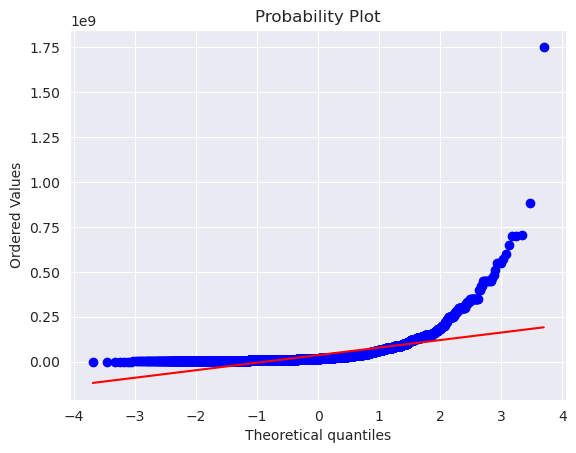

In [395]:
sns.histplot(final_df['Price'], bins=20, kde=True)

(mu, sigma) = norm.fit(final_df['Price'])
print(f'Normal distribution Mean: {mu:.5}, Skew: {final_df.Price.skew():.5} and Std Deviation: {sigma:.5}')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(final_df['Price'], plot=plt)
plt.show()

Before removing the outliers, let's set a baseline with the data we got

<h2> Modelling </h2>

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, MultiLabelBinarizer
from math import sqrt

In [397]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [398]:
models = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost' : XGBRegressor(),
    'LightGBM': LGBMRegressor(verbosity=-1),
    'CatBoost': CatBoostRegressor(verbose=False),
    'Gradient Boost': GradientBoostingRegressor()
}

In [399]:
X = final_df[['Bedrooms']]
y = final_df['Price']

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [401]:
def print_model_score(X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print('---------------------------------------------------------')
        print(model_name)
        print(f"Test data RMSE: {sqrt(mean_squared_error(y_pred=pred, y_true=y_test)):.6}")
        print(f"Test data R2 Score: {r2_score(y_pred=pred, y_true=y_test):.6}")

In [402]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 3.78496e+07
Test data R2 Score: 0.381849
---------------------------------------------------------
XGBoost
Test data RMSE: 3.78395e+07
Test data R2 Score: 0.382177
---------------------------------------------------------
LightGBM
Test data RMSE: 3.79532e+07
Test data R2 Score: 0.378461
---------------------------------------------------------
CatBoost
Test data RMSE: 3.78396e+07
Test data R2 Score: 0.382173
---------------------------------------------------------
Gradient Boost
Test data RMSE: 3.78392e+07
Test data R2 Score: 0.382188


<h2> Convert categorical columns to numeric </h2>

In [403]:
final_df.drop(['Payment_type', 'Location'], axis=1, inplace=True)

In [404]:
final_df.columns

Index(['Bedrooms', 'Bathrooms', 'Date', 'Amenities', 'Property Type', 'Price',
       'Sub_county'],
      dtype='object')

In [405]:
final_df[final_df.duplicated()].count()

Bedrooms         43
Bathrooms        43
Date             43
Amenities        43
Property Type    43
Price            43
Sub_county       43
dtype: int64

In [406]:
final_df.drop_duplicates(inplace=True, ignore_index=True)

In [407]:
final_df.count()

Bedrooms         6234
Bathrooms        6234
Date             6234
Amenities        6234
Property Type    6234
Price            6234
Sub_county       6234
dtype: int64

In [408]:
string_cols = ['Sub_county', 'Property Type']

In [409]:
ordinal_encoder = OrdinalEncoder()
final_df[string_cols] = ordinal_encoder.fit_transform(final_df[string_cols])
ordinal_encoder.categories_

[array(['Dagoretti North', 'Dagoretti South', 'Embakasi Central',
        'Embakasi East', 'Embakasi South', 'Embakasi West', 'Kamukunji',
        'Kasarani', 'Kibra', 'Langata', 'Makadara', 'Roysambu', 'Starehe',
        'Unknown', 'Westlands'], dtype=object),
 array(['flats-apartments', 'houses'], dtype=object)]

In [410]:
final_df.head()

,Bedrooms,Bathrooms,Date,Amenities,Property Type,Price,Sub_county
0,3.0000,4.0000,2024-07-23,"['Aircon', 'Alarm', 'BBQ', 'Backup Generator',...",1.0000,5500000,4.0000
1,7.0000,7.0000,2024-12-06,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",1.0000,240000000,14.0000
2,3.0000,3.0000,2024-08-07,"['Alarm', 'En Suite', 'Fibre Internet', 'Garde...",1.0000,7500000,9.0000
3,4.0000,4.0000,2024-07-26,"['Bus Stop', 'En Suite', 'Fibre Internet', 'Ga...",1.0000,110000000,14.0000
4,5.0000,5.0000,2024-07-31,"['Alarm', 'BBQ', 'Backup Generator', 'Balcony'...",1.0000,85000000,14.0000


<h2> Use one-hot encoding for the Amenities </h2>

In [411]:
def preprocess_amenities(amenities):
    amenities = amenities.replace('[', '')
    amenities = amenities.replace(']', '')
    amenities = amenities.replace("'", "")
    amenities = amenities.strip()
    return amenities

In [412]:
final_df['Amenities'] = final_df['Amenities'].apply(preprocess_amenities)

In [413]:
final_df['Amenities'].head()

0    Aircon, Alarm, BBQ, Backup Generator, Balcony,...
1    Alarm, BBQ, Backup Generator, Balcony, Bus Sto...
2     Alarm, En Suite, Fibre Internet, Garden, Parking
3    Bus Stop, En Suite, Fibre Internet, Garden, Ho...
4    Alarm, BBQ, Backup Generator, Balcony, Borehol...
Name: Amenities, dtype: object

In [414]:
mlb = MultiLabelBinarizer()

In [415]:
amenities_df = pd.DataFrame(mlb.fit_transform(final_df['Amenities'].str.split(', ')), columns=[x.strip() for x in mlb.classes_], index=final_df.index)

In [416]:
mlb.classes_

array(['', 'Aircon', 'Alarm', 'BBQ', 'Backup Generator', 'Balcony',
       'Borehole', 'Bus Stop', 'CCTV', 'Electric Fence', 'En Suite',
       'Fibre Internet', 'Furnished', 'Garden', 'Gated Community',
       'Golf Course', 'Gym', 'Hospital', 'Kids Play Area',
       'Lift/Elevator', 'Parking', 'Pet Friendly', 'Scenic View',
       'School', 'Sea View', 'Service Charge Included', 'Serviced',
       'Shopping Centre', 'Staff Quarters', 'Swimming Pool',
       'Walk In Closet', 'Wheelchair Access'], dtype=object)

In [417]:
amenities_df.head()

,,Aircon,Alarm,BBQ,Backup Generator,Balcony,Borehole,Bus Stop,CCTV,Electric Fence,...,Scenic View,School,Sea View,Service Charge Included,Serviced,Shopping Centre,Staff Quarters,Swimming Pool,Walk In Closet,Wheelchair Access
0,0,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,0,1,1
1,0,0,1,1,1,1,0,1,0,0,...,1,1,0,0,0,1,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
4,0,0,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,0,1


In [418]:
final_df = pd.concat([final_df.drop('Amenities', axis=1), amenities_df.drop('', axis=1)],axis=1)

In [419]:
final_df.head()

,Bedrooms,Bathrooms,Date,Property Type,Price,Sub_county,Aircon,Alarm,BBQ,Backup Generator,...,Scenic View,School,Sea View,Service Charge Included,Serviced,Shopping Centre,Staff Quarters,Swimming Pool,Walk In Closet,Wheelchair Access
0,3.0000,4.0000,2024-07-23,1.0000,5500000,4.0000,1,1,1,1,...,1,1,0,1,1,1,1,0,1,1
1,7.0000,7.0000,2024-12-06,1.0000,240000000,14.0000,0,1,1,1,...,1,1,0,0,0,1,1,0,1,0
2,3.0000,3.0000,2024-08-07,1.0000,7500000,9.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0000,4.0000,2024-07-26,1.0000,110000000,14.0000,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,5.0000,5.0000,2024-07-31,1.0000,85000000,14.0000,0,1,1,1,...,1,1,0,0,0,1,1,1,0,1


In [420]:
print(final_df.corr().Price.sort_values(ascending=False).head())
print('\n')
print(final_df.corr().Price.sort_values(ascending=False).tail())

Price            1.0000
Bedrooms         0.5023
Bathrooms        0.4969
Property Type    0.4074
Staff Quarters   0.3189
Name: Price, dtype: float64


Kids Play Area   -0.0600
Bus Stop         -0.0664
Gym              -0.1529
Pet Friendly     -0.1681
Lift/Elevator    -0.3286
Name: Price, dtype: float64


In [421]:
X = final_df.drop(['Price', 'Date'], axis=1)
y = final_df['Price']

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [423]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 3.76563e+07
Test data R2 Score: 0.467832
---------------------------------------------------------
XGBoost
Test data RMSE: 3.95328e+07
Test data R2 Score: 0.413474
---------------------------------------------------------
LightGBM
Test data RMSE: 3.45329e+07
Test data R2 Score: 0.552454
---------------------------------------------------------
CatBoost
Test data RMSE: 3.67896e+07
Test data R2 Score: 0.492048
---------------------------------------------------------
Gradient Boost
Test data RMSE: 3.65246e+07
Test data R2 Score: 0.49934


LightGBM has the highest score - 0.55

<h2> Remove outliers </h2>

In an earlier instance, we saw an extreme outlier of 1.75 billion. Let's remove it

In [424]:
final_df = final_df[final_df.Price < 1000000000].reset_index(drop=True)

In [425]:
X = final_df.drop(['Price', 'Date'], axis=1)
y = final_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [426]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 4.0651e+07
Test data R2 Score: 0.412583
---------------------------------------------------------
XGBoost
Test data RMSE: 4.00151e+07
Test data R2 Score: 0.430816
---------------------------------------------------------
LightGBM
Test data RMSE: 3.64086e+07
Test data R2 Score: 0.528793
---------------------------------------------------------
CatBoost
Test data RMSE: 3.74394e+07
Test data R2 Score: 0.501732
---------------------------------------------------------
Gradient Boost
Test data RMSE: 3.87952e+07
Test data R2 Score: 0.464992


Apply Interquartile range to get rid of the outliers

In [427]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = final_df['Price'].quantile(0.25)
Q3 = final_df['Price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
final_df_no_outliers = final_df[(final_df['Price'] >= lower_bound) & (final_df['Price'] <= upper_bound)].reset_index(drop=True)

In [428]:
px.box(data_frame=final_df, y='Price', title='Boxplot before IQR Outlier Removal')

In [429]:
px.box(data_frame=final_df_no_outliers, y='Price', title='Boxplot after IQR Outlier Removal')

In [430]:
print(f'Number of rows after IQR outlier removal: {final_df_no_outliers.Bedrooms.count()}')

Number of rows after IQR outlier removal: 5642


In [431]:
X = final_df_no_outliers.drop(['Price', 'Date'], axis=1)
y = final_df_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [432]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 1.12295e+07
Test data R2 Score: 0.650746
---------------------------------------------------------
XGBoost
Test data RMSE: 1.09636e+07
Test data R2 Score: 0.667094
---------------------------------------------------------
LightGBM
Test data RMSE: 1.07917e+07
Test data R2 Score: 0.67745
---------------------------------------------------------
CatBoost
Test data RMSE: 1.0784e+07
Test data R2 Score: 0.677907
---------------------------------------------------------
Gradient Boost
Test data RMSE: 1.1274e+07
Test data R2 Score: 0.647972


Got a higher score - 0.6779 from CatBoost

<h2> Log Transforming the Price Column </h2>

Without Outliers Removed

In [433]:
final_df['Log Price'] = np.log(final_df['Price'])

In [434]:
final_df[['Price', 'Log Price']].head()

,Price,Log Price
0,5500000,15.5203
1,240000000,19.2961
2,7500000,15.8304
3,110000000,18.5160
4,85000000,18.2582


In [435]:
final_df['Log Price'].describe()

count   6233.0000
mean      16.8353
std        1.0184
min       10.9508
25%       16.0668
50%       16.7059
75%       17.5044
max       20.5954
Name: Log Price, dtype: float64

Normal distribution Mean: 16.835, Skew: 0.41723 and Std Deviation: 1.0183


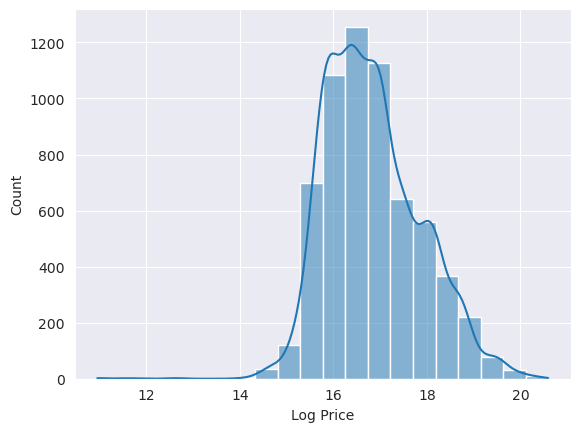

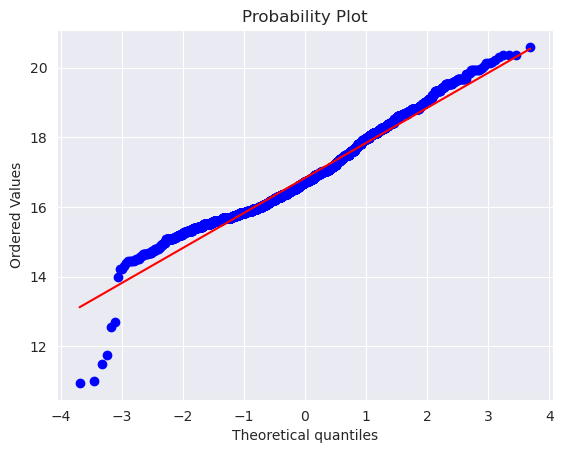

In [436]:
sns.histplot(final_df['Log Price'], bins=20, kde=True)

(mu, sigma) = norm.fit(final_df['Log Price'])
print(f'Normal distribution Mean: {mu:.5}, Skew: {final_df['Log Price'].skew():.5} and Std Deviation: {sigma:.5}')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(final_df['Log Price'], plot=plt)
plt.show()

In [437]:
# Reverse log the prices
def logs_print_model_score(X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print('---------------------------------------------------------')
        print(model_name)
        print(f"Test data RMSE: {sqrt(mean_squared_error(y_pred=np.exp(pred), y_true=np.exp(y_test))):.6}")
        print(f"Test data R2 Score: {r2_score(y_pred=np.exp(pred), y_true=np.exp(y_test)):.6}")

In [438]:
X = final_df.drop(['Price', 'Log Price', 'Date'], axis=1)
y = final_df['Log Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [439]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 0.562125
Test data R2 Score: 0.689438
---------------------------------------------------------
XGBoost
Test data RMSE: 0.557302
Test data R2 Score: 0.694743
---------------------------------------------------------
LightGBM
Test data RMSE: 0.52562
Test data R2 Score: 0.728464
---------------------------------------------------------
CatBoost
Test data RMSE: 0.521714
Test data R2 Score: 0.732484
---------------------------------------------------------
Gradient Boost
Test data RMSE: 0.547349
Test data R2 Score: 0.705549


In [440]:
logs_print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 3.70927e+07
Test data R2 Score: 0.510919
---------------------------------------------------------
XGBoost
Test data RMSE: 3.69456e+07
Test data R2 Score: 0.514788
---------------------------------------------------------
LightGBM
Test data RMSE: 3.65913e+07
Test data R2 Score: 0.524051
---------------------------------------------------------
CatBoost
Test data RMSE: 3.65849e+07
Test data R2 Score: 0.524216
---------------------------------------------------------
Gradient Boost
Test data RMSE: 3.77309e+07
Test data R2 Score: 0.493943


After Outlier Removal

In [441]:
final_df_no_outliers['Log Price'] = np.log(final_df_no_outliers['Price'])

In [442]:
final_df_no_outliers[['Price', 'Log Price']].tail()

,Price,Log Price
5637,43500000,17.5883
5638,11250000,16.2359
5639,9300000,16.0455
5640,80000000,18.1975
5641,28000000,17.1477


In [443]:
final_df_no_outliers['Log Price'].describe()

count   5642.0000
mean      16.6267
std        0.8159
min       10.9508
25%       15.9903
50%       16.5881
75%       17.1828
max       18.2582
Name: Log Price, dtype: float64

Normal distribution Mean: 16.627, Skew: -0.094198 and Std Deviation: 0.81581


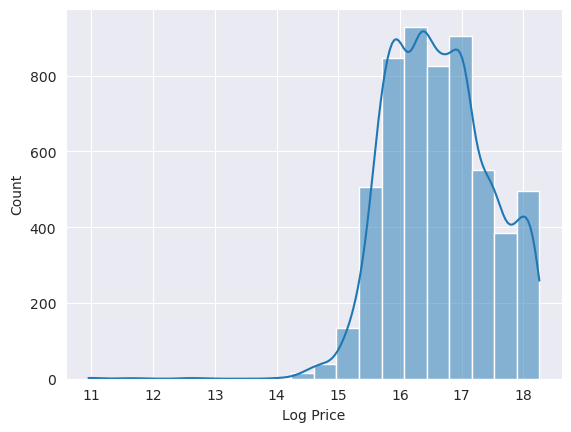

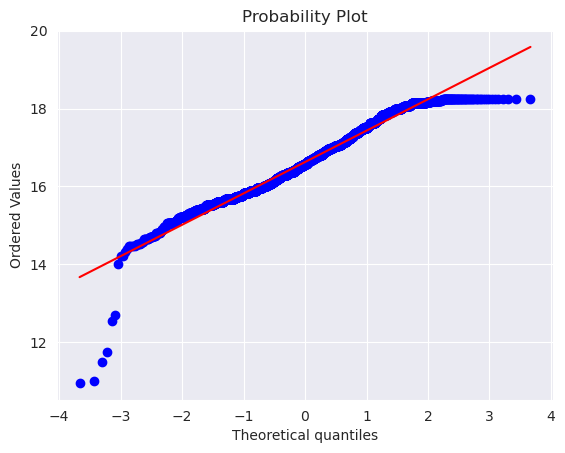

In [444]:
sns.histplot(final_df_no_outliers['Log Price'], bins=20, kde=True)

(mu, sigma) = norm.fit(final_df_no_outliers['Log Price'])
print(f'Normal distribution Mean: {mu:.5}, Skew: {final_df_no_outliers['Log Price'].skew():.5} and Std Deviation: {sigma:.5}')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(final_df_no_outliers['Log Price'], plot=plt)
plt.show()

In [445]:
X = final_df_no_outliers.drop(['Price', 'Log Price', 'Date'], axis=1)
y = final_df_no_outliers['Log Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [446]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 0.410609
Test data R2 Score: 0.731309
---------------------------------------------------------
XGBoost
Test data RMSE: 0.440492
Test data R2 Score: 0.690778
---------------------------------------------------------
LightGBM
Test data RMSE: 0.397109
Test data R2 Score: 0.748688
---------------------------------------------------------
CatBoost
Test data RMSE: 0.407023
Test data R2 Score: 0.735982
---------------------------------------------------------
Gradient Boost
Test data RMSE: 0.414346
Test data R2 Score: 0.726397


In [447]:
logs_print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 1.10398e+07
Test data R2 Score: 0.662448
---------------------------------------------------------
XGBoost
Test data RMSE: 1.10358e+07
Test data R2 Score: 0.662694
---------------------------------------------------------
LightGBM
Test data RMSE: 1.08892e+07
Test data R2 Score: 0.671594
---------------------------------------------------------
CatBoost
Test data RMSE: 1.08968e+07
Test data R2 Score: 0.671133
---------------------------------------------------------
Gradient Boost
Test data RMSE: 1.17456e+07
Test data R2 Score: 0.61791


Transforming the target variable didn't quite increase the results as expected

<h2> Convert date to features </h2>

In [448]:
final_df_no_outliers['Month'] = final_df_no_outliers['Date'].dt.month
final_df_no_outliers['Year'] = final_df_no_outliers['Date'].dt.year
final_df_no_outliers['Day'] = final_df_no_outliers['Date'].dt.day
final_df_no_outliers['Day of Week'] = final_df_no_outliers['Date'].dt.dayofweek

In [449]:
final_df_no_outliers.corr()

,Bedrooms,Bathrooms,Date,Property Type,Price,Sub_county,Aircon,Alarm,BBQ,Backup Generator,...,Shopping Centre,Staff Quarters,Swimming Pool,Walk In Closet,Wheelchair Access,Log Price,Month,Year,Day,Day of Week
Bedrooms,1.0000,0.8745,-0.0037,0.5836,0.6513,0.1151,-0.0067,-0.0671,-0.0094,-0.2685,...,-0.1215,0.3858,-0.2022,0.1197,-0.1172,0.7249,-0.0015,-0.0036,-0.0049,-0.0579
Bathrooms,0.8745,1.0000,0.0095,0.4992,0.6549,0.0950,0.0618,0.0329,0.0904,-0.1428,...,-0.0684,0.4133,-0.0912,0.2153,-0.0203,0.7113,0.0081,0.0038,0.0055,-0.0759
Date,-0.0037,0.0095,1.0000,-0.0095,-0.0027,-0.0792,0.1092,0.1014,0.0959,0.0986,...,0.1117,0.1122,0.0253,0.0914,0.0497,-0.0199,0.9029,0.3239,0.2504,-0.0722
Property Type,0.5836,0.4992,-0.0095,1.0000,0.4933,0.1480,-0.0206,-0.0880,-0.0379,-0.4279,...,-0.0994,0.4176,-0.3227,0.0622,-0.1541,0.4348,-0.0075,-0.0125,0.0223,-0.0494
Price,0.6513,0.6549,-0.0027,0.4933,1.0000,0.1583,0.0398,-0.0095,0.0403,-0.1084,...,-0.1040,0.3978,-0.0653,0.1577,-0.0547,0.9079,-0.0036,0.0065,-0.0151,-0.0379
Sub_county,0.1151,0.0950,-0.0792,0.1480,0.1583,1.0000,-0.0507,-0.1343,-0.0759,-0.1723,...,-0.1244,0.0300,0.0023,-0.0379,-0.0891,0.1801,-0.0762,0.0120,-0.1118,-0.0591
Aircon,-0.0067,0.0618,0.1092,-0.0206,0.0398,-0.0507,1.0000,0.4796,0.4418,0.2821,...,0.2068,0.1424,0.1396,0.3939,0.3705,0.0104,0.0930,0.0147,0.1451,-0.0303
Alarm,-0.0671,0.0329,0.1014,-0.0880,-0.0095,-0.1343,0.4796,1.0000,0.5381,0.4484,...,0.3366,0.2002,0.2217,0.4195,0.4776,-0.0265,0.0688,0.0383,0.1840,0.0226
BBQ,-0.0094,0.0904,0.0959,-0.0379,0.0403,-0.0759,0.4418,0.5381,1.0000,0.3695,...,0.2895,0.2449,0.2291,0.4414,0.4690,0.0223,0.0649,0.0344,0.1829,-0.0159
Backup Generator,-0.2685,-0.1428,0.0986,-0.4279,-0.1084,-0.1723,0.2821,0.4484,0.3695,1.0000,...,0.3488,0.0283,0.4081,0.3192,0.4092,-0.1158,0.0764,0.0501,0.0572,0.0875


In [450]:
X = final_df_no_outliers.drop(['Price', 'Log Price', 'Date'], axis=1)
y = final_df_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [451]:
print_model_score(X_train, X_test, y_train, y_test)

---------------------------------------------------------
Random Forest
Test data RMSE: 1.09865e+07
Test data R2 Score: 0.665702
---------------------------------------------------------
XGBoost
Test data RMSE: 1.09566e+07
Test data R2 Score: 0.667518
---------------------------------------------------------
LightGBM
Test data RMSE: 1.06876e+07
Test data R2 Score: 0.683643
---------------------------------------------------------
CatBoost
Test data RMSE: 1.05724e+07
Test data R2 Score: 0.690423
---------------------------------------------------------
Gradient Boost
Test data RMSE: 1.14188e+07
Test data R2 Score: 0.638874


Got even better scores with CatBoost taking the cake

<h2> Feature Selection </h2>

In [469]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

In [455]:
def cat_model_performance(X_train, X_test, y_train, y_test):
    cat_model = CatBoostRegressor(verbose=False)

    cat_model.fit(X_train, y_train)

    y_pred_train = cat_model.predict(X_train)
    y_pred_test = cat_model.predict(X_test)
    
    print('Training Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)))
    print('Test Root Mean Squared Error: ', sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
    print('\n')
    print('Training R2 Score: ', r2_score(y_true=y_train, y_pred=y_pred_train))
    print('Test R2 Score: ', r2_score(y_true=y_test, y_pred=y_pred_test))
    
    return cat_model

In [456]:
model = cat_model_performance(X_train, X_test, y_train, y_test)

Training Root Mean Squared Error:  6633139.568330588
Test Root Mean Squared Error:  10572428.720742028


Training R2 Score:  0.8861118066077386
Test R2 Score:  0.6904233774275743


Plot Feature importance

In [476]:
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
fi_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
fi_df = fi_df.sort_values(by='importance', ascending=False)

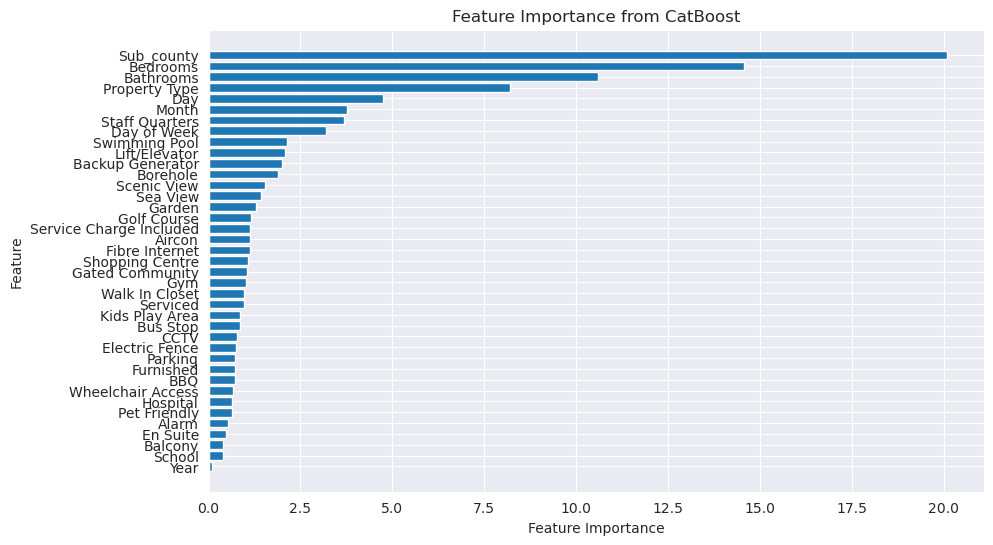

In [477]:
plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from CatBoost')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

In [490]:
thresholds = sort(model.feature_importances_)

In [491]:
thresholds

array([ 0.10002708,  0.38407543,  0.38747437,  0.48311056,  0.52093146,
        0.63140414,  0.63672248,  0.6635893 ,  0.71240185,  0.71240454,
        0.72938645,  0.75403374,  0.7852452 ,  0.84955365,  0.85514004,
        0.96522207,  0.97501971,  1.02083378,  1.03889114,  1.06521981,
        1.11491931,  1.13454711,  1.13614654,  1.14396528,  1.27806418,
        1.43338356,  1.54375481,  1.90008047,  2.00123643,  2.07411983,
        2.13100933,  3.20293779,  3.67493991,  3.7685132 ,  4.75489825,
        8.20407161, 10.59464925, 14.56591136, 20.07216497])

Select the right number of features needed for training

In [498]:
# Pick models with best performance above the provided thresholds
for thresh in thresholds:
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    selection_model = CatBoostRegressor(verbose=False)
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    r2 = r2_score(y_test, predictions)
    print(f"Threshold: {thresh:.3}, Number of features: {select_X_train.shape[1]}, R2_Score: {r2:.5}")

Threshold: 0.1, Number of features: 39, R2_Score: 0.69042
Threshold: 0.384, Number of features: 38, R2_Score: 0.69132
Threshold: 0.387, Number of features: 37, R2_Score: 0.69174
Threshold: 0.483, Number of features: 36, R2_Score: 0.69437
Threshold: 0.521, Number of features: 35, R2_Score: 0.68971
Threshold: 0.631, Number of features: 34, R2_Score: 0.68849
Threshold: 0.637, Number of features: 33, R2_Score: 0.6909
Threshold: 0.664, Number of features: 32, R2_Score: 0.68807
Threshold: 0.712, Number of features: 31, R2_Score: 0.68995
Threshold: 0.712, Number of features: 30, R2_Score: 0.69291
Threshold: 0.729, Number of features: 29, R2_Score: 0.68956
Threshold: 0.754, Number of features: 28, R2_Score: 0.6927
Threshold: 0.785, Number of features: 27, R2_Score: 0.68568
Threshold: 0.85, Number of features: 26, R2_Score: 0.6851
Threshold: 0.855, Number of features: 25, R2_Score: 0.68666
Threshold: 0.965, Number of features: 24, R2_Score: 0.68539
Threshold: 0.975, Number of features: 23, R2_S

The threshold of 0.483 had the best results

In [501]:
relevant_features = fi_df.head(36).feature

In [510]:
final_df_no_outliers.duplicated().any()

False

In [527]:
X_relevant = final_df_no_outliers[relevant_features.to_numpy()]
y = final_df_no_outliers['Price']

X_train, X_test, y_train, y_test = train_test_split(X_relevant, y, test_size=0.2, random_state=101)

model = cat_model_performance(X_train, X_test, y_train, y_test)

Training Root Mean Squared Error:  6610301.7508133035
Test Root Mean Squared Error:  10478761.314413546


Training R2 Score:  0.8868946878417556
Test R2 Score:  0.6958845232441582


Final results from the sale data is an R2 score of 0.695